# Split the prepped, released data for the model

In [1]:
# Import packages we need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,shutil

In [2]:
#load the release data
release_data = pd.read_csv('../data/tables/labelerdata/ReleaseData09082021.csv')

In [3]:
priority = release_data

In [4]:
list(priority.columns)

['Unnamed: 0',
 'userId',
 'storm_id',
 'image',
 'allWater',
 'devType',
 'washoverType',
 'dmgType',
 'impactType',
 'terrianType',
 'total',
 'LabelerArchive',
 'NOAA_flight']

In [5]:
priority.shape

(8287, 13)

In [6]:
priority.head()

,Unnamed: 0,userId,storm_id,image,allWater,devType,washoverType,dmgType,impactType,terrianType,total,LabelerArchive,NOAA_flight
0,0,1,florence,P26058806.jpg,True,undeveloped,noWashover,noDamage,NaN,NaN,100,Florence,florence/20180917a_jpgs
1,1,1,florence,P26057665.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100,Florence,florence/20180917a_jpgs
2,2,1,florence,P26059250.jpg,False,developed,washover,noDamage,"swash,collision,overwash",sandyCoastline,100,Florence,florence/20180917a_jpgs
3,3,1,florence,P26060067.jpg,False,undeveloped,noWashover,noDamage,"swash,collision",sandyCoastline,100,Florence,florence/20180917a_jpgs
4,4,1,florence,P26057539.jpg,False,undeveloped,washover,noDamage,"swash,collision,overwash",sandyCoastline,100,Florence,florence/20180917a_jpgs


In [7]:
#combine the storm name and archive into the flight tag
priority["Full_Image"] = priority["NOAA_flight"] + "/" + priority['image']


washData = priority[['Full_Image', 'userId', 'washoverType']]
priority = priority.replace({np.NaN: 'noWashover'})
washData.head()

,Full_Image,userId,washoverType
0,florence/20180917a_jpgs/P26058806.jpg,1,noWashover
1,florence/20180917a_jpgs/P26057665.jpg,1,noWashover
2,florence/20180917a_jpgs/P26059250.jpg,1,washover
3,florence/20180917a_jpgs/P26060067.jpg,1,noWashover
4,florence/20180917a_jpgs/P26057539.jpg,1,washover


In [8]:
washData.duplicated(subset=["Full_Image","userId"])

0       False
1       False
2       False
3       False
4       False
        ...  
8282    False
8283    False
8284    False
8285    False
8286    False
Length: 8287, dtype: bool

In [9]:
# pivot the wash data
washDataPivot = washData.pivot(index= 'Full_Image', columns='userId')
washDataPivot.head()

washoverType                                \
userId                                       1    2    3    4    5    6    7    
Full_Image                                                                      
barry/20190716a_jpgs/C19748971.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746920.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746926.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746929.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746935.jpg     washover  NaN  NaN  NaN  NaN  NaN  NaN   

                                                   ...                      \
userId                               8    9    10  ...   14   15   16   17   
Full_Image                                         ...                       
barry/20190716a_jpgs/C19748971.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746920.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746926.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746929.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   
barry/20190716a_jpgs/P19746935.jpg  NaN  NaN  NaN  ...  NaN  NaN  NaN  NaN   

                                                                  
userId                               18   19   20   21   22   23  
Full_Image                                                        
barry/20190716a_jpgs/C19748971.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746920.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746926.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746929.jpg  NaN  NaN  NaN  NaN  NaN  NaN  
barry/20190716a_jpgs/P19746935.jpg  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 23 columns]

In [10]:
#save it to a file
washDataPivot.to_csv('../data/tables/labelerdata/Pivoted_Wash.csv')

### Now investigate the data

In [11]:
wash = pd.read_csv('../data/tables/labelerdata/Pivoted_Wash.csv', skiprows = 2)
#del wash ['Unnamed: 2']

#wash.head()

In [12]:
wash = wash.replace('noWashover', 0)
wash = wash.replace('washover', 1)
wash.head()

,Full_Image,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,barry/20190716a_jpgs/C19748971.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,barry/20190716a_jpgs/P19746920.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,barry/20190716a_jpgs/P19746926.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,barry/20190716a_jpgs/P19746929.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,barry/20190716a_jpgs/P19746935.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#add a summary column to count washover votes
col_list= list(wash)
col_list.remove('Full_Image')
wash['wash_votes'] = wash[col_list].sum(axis=1)
wash["wash_votes"] = pd.to_numeric(wash["wash_votes"], errors='coerce')
wash.head()

#save to file
#wash.to_csv('../data/tables/washtally.csv')

,Full_Image,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,wash_votes
0,barry/20190716a_jpgs/C19748971.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,barry/20190716a_jpgs/P19746920.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,barry/20190716a_jpgs/P19746926.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,barry/20190716a_jpgs/P19746929.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,barry/20190716a_jpgs/P19746935.jpg,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
#extract just the vote data
washScores = wash[['Full_Image','wash_votes']]
washScores

,Full_Image,wash_votes
0,barry/20190716a_jpgs/C19748971.jpg,1.0
1,barry/20190716a_jpgs/P19746920.jpg,1.0
2,barry/20190716a_jpgs/P19746926.jpg,1.0
3,barry/20190716a_jpgs/P19746929.jpg,1.0
4,barry/20190716a_jpgs/P19746935.jpg,1.0
...,...,...
2945,zeta/20201030b_jpgs/S30482265.jpg,0.0
2946,zeta/20201030b_jpgs/S30482310.jpg,0.0
2947,zeta/20201030b_jpgs/S30482337.jpg,0.0
2948,zeta/20201030b_jpgs/S30482915.jpg,0.0


In [15]:
#join hashes and washScores
df = pd.read_csv('../data/tables/MasterDF_08262021_R6_T.csv')

# selecting rows based on bbeing labeled
L_df = df[df['labeled'].notnull()]

#Any Duplicates?, should be false via: 
#https://stackoverflow.com/questions/50242968/check-for-duplicate-values-in-pandas-dataframe-column

L_df.duplicated(subset=['image','storm_id']).any()

print(L_df.shape)

(3432, 20)


In [16]:
L_df.head()

,Filename,Prediction1,Prediction2,Prediction3,Prediction4,archive,image,date,labeled,ll_lat,ll_lon,lr_lat,lr_lon,size,storm_id,ul_lat,ul_lon,ur_lat,ur_lon,Prediction5
6,Barry/20190716a_jpgs/jpgs/C19748971.jpg,0.013530,0.411274,0.315693,0.505394,20190716a_jpgs,C19748971.jpg,2019-07-16,5.0,29.532414,-92.313437,29.529874,-92.301467,6734538,barry,29.540080,-92.311466,29.537953,-92.299447,0.182051
903,Barry/20190716a_jpgs/jpgs/C19758722.jpg,0.373085,0.198426,0.272742,0.416424,20190716a_jpgs,C19758722.jpg,2019-07-16,6.0,30.098675,-93.310681,30.103762,-93.310932,6631479,barry,30.098211,-93.314262,30.103157,-93.315712,0.748724
1027,Barry/20190716a_jpgs/jpgs/P19746920.jpg,0.631180,0.125718,0.930648,0.420183,20190716a_jpgs,P19746920.jpg,2019-07-16,6.0,29.697096,-93.818785,29.699831,-93.815273,4698985,barry,29.699903,-93.823397,29.704103,-93.817955,0.507434
1029,Barry/20190716a_jpgs/jpgs/P19746926.jpg,0.926416,0.341862,0.808487,0.519149,20190716a_jpgs,P19746926.jpg,2019-07-16,5.0,29.700794,-93.815834,29.703692,-93.812107,5064304,barry,29.704318,-93.822209,29.709575,-93.815407,0.679793
1030,Barry/20190716a_jpgs/jpgs/P19746929.jpg,0.916929,0.318669,0.598361,0.464885,20190716a_jpgs,P19746929.jpg,2019-07-16,5.0,29.702348,-93.813807,29.705077,-93.809986,5078525,barry,29.705950,-93.819703,29.710732,-93.812895,0.504528


In [17]:
#combine the storm name and archive into the flight tag
L_df["Full_Image"] = L_df["storm_id"] + "/" + L_df['archive'] + "/" + L_df['image']

L_df.head()

<ipython-input-17-19377acf1a9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L_df["Full_Image"] = L_df["storm_id"] + "/" + L_df['archive'] + "/" + L_df['image']


,Filename,Prediction1,Prediction2,Prediction3,Prediction4,archive,image,date,labeled,ll_lat,...,lr_lat,lr_lon,size,storm_id,ul_lat,ul_lon,ur_lat,ur_lon,Prediction5,Full_Image
6,Barry/20190716a_jpgs/jpgs/C19748971.jpg,0.013530,0.411274,0.315693,0.505394,20190716a_jpgs,C19748971.jpg,2019-07-16,5.0,29.532414,...,29.529874,-92.301467,6734538,barry,29.540080,-92.311466,29.537953,-92.299447,0.182051,barry/20190716a_jpgs/C19748971.jpg
903,Barry/20190716a_jpgs/jpgs/C19758722.jpg,0.373085,0.198426,0.272742,0.416424,20190716a_jpgs,C19758722.jpg,2019-07-16,6.0,30.098675,...,30.103762,-93.310932,6631479,barry,30.098211,-93.314262,30.103157,-93.315712,0.748724,barry/20190716a_jpgs/C19758722.jpg
1027,Barry/20190716a_jpgs/jpgs/P19746920.jpg,0.631180,0.125718,0.930648,0.420183,20190716a_jpgs,P19746920.jpg,2019-07-16,6.0,29.697096,...,29.699831,-93.815273,4698985,barry,29.699903,-93.823397,29.704103,-93.817955,0.507434,barry/20190716a_jpgs/P19746920.jpg
1029,Barry/20190716a_jpgs/jpgs/P19746926.jpg,0.926416,0.341862,0.808487,0.519149,20190716a_jpgs,P19746926.jpg,2019-07-16,5.0,29.700794,...,29.703692,-93.812107,5064304,barry,29.704318,-93.822209,29.709575,-93.815407,0.679793,barry/20190716a_jpgs/P19746926.jpg
1030,Barry/20190716a_jpgs/jpgs/P19746929.jpg,0.916929,0.318669,0.598361,0.464885,20190716a_jpgs,P19746929.jpg,2019-07-16,5.0,29.702348,...,29.705077,-93.809986,5078525,barry,29.705950,-93.819703,29.710732,-93.812895,0.504528,barry/20190716a_jpgs/P19746929.jpg


In [18]:
### Subset just the filename and the image
L_df = L_df[['Filename','Full_Image']]

#merge to WASH dataframe
joinedWash = pd.merge(washScores, L_df, on="Full_Image", how = "left")

#joinedWash= joinedWash.drop_duplicates()
#joinedWash.to_csv('../data/Test.csv')
joinedWash

,Full_Image,wash_votes,Filename
0,barry/20190716a_jpgs/C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg
1,barry/20190716a_jpgs/P19746920.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746920.jpg
2,barry/20190716a_jpgs/P19746926.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746926.jpg
3,barry/20190716a_jpgs/P19746929.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746929.jpg
4,barry/20190716a_jpgs/P19746935.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746935.jpg
...,...,...,...
2945,zeta/20201030b_jpgs/S30482265.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482265.jpg
2946,zeta/20201030b_jpgs/S30482310.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482310.jpg
2947,zeta/20201030b_jpgs/S30482337.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482337.jpg
2948,zeta/20201030b_jpgs/S30482915.jpg,0.0,Zeta/20201030b_jpgs/jpgs/S30482915.jpg


In [19]:
joinedWash.to_csv('../data/Test.csv')

Text(0, 0.5, 'number of images')

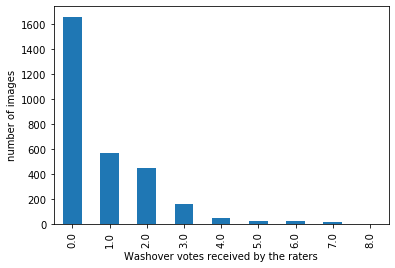

In [20]:
#plot it up
ax = joinedWash['wash_votes'].value_counts().sort_index().plot.bar()
ax.set_xlabel("Washover votes received by the raters")
ax.set_ylabel("number of images")

## Now we can go back to splitting the washover data based on votes:

In [21]:
washTally = joinedWash
washTally.head()

,Full_Image,wash_votes,Filename
0,barry/20190716a_jpgs/C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg
1,barry/20190716a_jpgs/P19746920.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746920.jpg
2,barry/20190716a_jpgs/P19746926.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746926.jpg
3,barry/20190716a_jpgs/P19746929.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746929.jpg
4,barry/20190716a_jpgs/P19746935.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746935.jpg


In [22]:
#add the path
washTally['Image_Path'] = '/data/NOAA_ERI/' + washTally['Filename']
washTally.head()

,Full_Image,wash_votes,Filename,Image_Path
0,barry/20190716a_jpgs/C19748971.jpg,1.0,Barry/20190716a_jpgs/jpgs/C19748971.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/C1974...
1,barry/20190716a_jpgs/P19746920.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746920.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...
2,barry/20190716a_jpgs/P19746926.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746926.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...
3,barry/20190716a_jpgs/P19746929.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746929.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...
4,barry/20190716a_jpgs/P19746935.jpg,1.0,Barry/20190716a_jpgs/jpgs/P19746935.jpg,/data/NOAA_ERI/Barry/20190716a_jpgs/jpgs/P1974...


In [23]:
#if image has 1 or more vote for washover, it is a washover

MaxVote = int(washTally['wash_votes'].max() +1)

for i in range(0,MaxVote):
    #pull out the list from the df
    Tally = washTally[washTally['wash_votes'] == i]
    TallyList = Tally['Image_Path'].tolist()
    if i == 0:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsSix/nowash'
    else:
        TallyFolder = '../data/pics/labelertoModel/AllRoundsSix/wash'
    print(TallyFolder)
    #move those on the list
    for f in TallyList:
        #print(f)
        shutil.copy(f, TallyFolder)

../data/pics/labelertoModel/AllRoundsSix/nowash
../data/pics/labelertoModel/AllRoundsSix/wash
../data/pics/labelertoModel/AllRoundsSix/wash
../data/pics/labelertoModel/AllRoundsSix/wash
../data/pics/labelertoModel/AllRoundsSix/wash
../data/pics/labelertoModel/AllRoundsSix/wash
../data/pics/labelertoModel/AllRoundsSix/wash
../data/pics/labelertoModel/AllRoundsSix/wash
../data/pics/labelertoModel/AllRoundsSix/wash


In [ ]:
#sned original florence images to those directories